In [9]:
from warnings import filterwarnings
filterwarnings("ignore")

# Data

In [1]:
A = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
     ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
     ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
     ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
     ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


In [2]:
A

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Transaction Details

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
Q=pd.DataFrame(te.fit_transform(A),columns=te.columns_)

Q[["Milk","Apple"]]

,Milk,Apple
0,True,False
1,False,False
2,True,True
3,True,False
4,False,False


# To Find Minimum Support

In [4]:
from mlxtend.frequent_patterns import apriori
apriori(Q,use_colnames=True,min_support=0.6)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


# To Find Confidance

In [5]:
def conf(df,item1,item2):
    x=df[item1].sum()
    y=df[[item1,item2]][(df[item1]==True) & (df[item2]==True)].shape[0]
    return y/x



In [6]:
conf(Q,"Eggs","Apple")

0.25

In [7]:
conf(Q,"Corn","Apple")

0.0

In [8]:
conf(Q,"Kidney Beans","Apple")

0.2

# Hierarchical Clustering

In [11]:
A=pd.read_csv("C:/Users/Dell/Desktop/dk07/Cars93.csv")

In [12]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [13]:
df=A[["Price","MPG.city"]]

In [14]:
df

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22
...,...,...
88,19.7,17
89,20.0,21
90,23.3,18
91,22.7,21


# Standardizaion of the Data

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
C=pd.DataFrame(ss.fit_transform(df),columns=["Price","MPG.city"])

# Creating Model

In [16]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=5)
model=ag.fit(C)
model.labels_

array([2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0,
       3, 2, 2, 1, 2, 0, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1, 4, 3, 2, 4, 2, 3,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 2, 1, 3, 0, 3, 2, 1,
       1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 0, 0, 3, 3, 2, 2, 4, 3, 2, 2, 0, 2,
       1, 1, 0, 1, 0], dtype=int64)

In [17]:
from scipy.spatial import distance_matrix
DM=pd.DataFrame(distance_matrix(C.values,C.values))

In [18]:
#DM

# Dendrogram

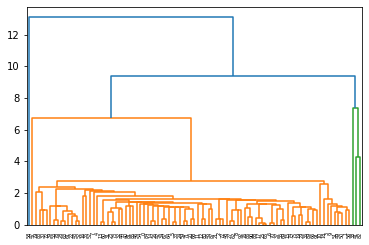

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
dendrogram(linkage(DM))
plt.show()